In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv("digitRecognizer.csv")

In [47]:
df.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
40385,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6721,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14251,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6165,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5669,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df.shape

(42000, 785)

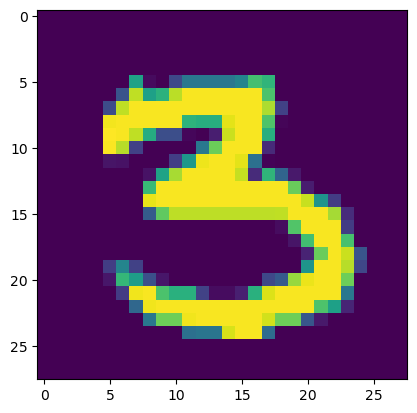

In [49]:
plt.imshow(df.iloc[6520,1:].values.reshape(28,28))

## Without PCA

In [50]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
x_train.shape

(33600, 784)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier()

In [55]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [56]:
import time
start = time.time()
y_pred = knn.predict(x_test)
print(time.time()-start)

6.403259992599487


In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

## Now With PCA

In [58]:
# first we will scale it bcz its nessacary fro  pca
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [59]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [93]:
# Now using pca
from sklearn.decomposition import PCA
pca = PCA(n_components=None)  # n_components means how many columns you want get the best columns i will get 100 therefor x_train after pca is 100

In [94]:
x_train_trf=pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [95]:
x_train_trf.shape

(33600, 784)

In [96]:
knn = KNeighborsClassifier()

In [97]:
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [98]:
y_pred = knn.predict(x_test_trf)

In [99]:
accuracy_score(y_test,y_pred)

0.9391666666666667

### so the advantage of pca is that it give almost similar answer but take less time while training model

### another advantage of pca is that we can see a high dimensional data into 3rd or 2nd of human readable form

### Parameters of PCA

In [100]:
pca.explained_variance_
#egain value

array([4.06711120e+01, 2.91702340e+01, 2.67445962e+01, 2.08534479e+01,
       1.81489188e+01, 1.58529825e+01, 1.38710810e+01, 1.24805897e+01,
       1.10279424e+01, 1.00958253e+01, 9.63317821e+00, 8.62785945e+00,
       8.06303131e+00, 7.89511749e+00, 7.44167929e+00, 7.17032873e+00,
       6.73266373e+00, 6.62744023e+00, 6.41499161e+00, 6.25808269e+00,
       5.90495742e+00, 5.76521585e+00, 5.52084601e+00, 5.32003847e+00,
       5.18309925e+00, 4.93439597e+00, 4.90652171e+00, 4.71800493e+00,
       4.49824444e+00, 4.43140305e+00, 4.32604521e+00, 4.23491831e+00,
       4.10335015e+00, 4.06731180e+00, 4.02362178e+00, 3.84130473e+00,
       3.81886146e+00, 3.71316498e+00, 3.60918108e+00, 3.47303214e+00,
       3.42842989e+00, 3.38841159e+00, 3.29157511e+00, 3.22927379e+00,
       3.21745142e+00, 3.15810372e+00, 3.12620905e+00, 3.10412385e+00,
       3.05892795e+00, 3.03728188e+00, 2.96540461e+00, 2.94033669e+00,
       2.86828564e+00, 2.82617865e+00, 2.80038441e+00, 2.77411221e+00,
      

In [101]:
pca.components_
# egain vector

array([[-1.50074992e-19,  1.66533454e-16,  5.55111512e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.77002386e-20,  5.55111512e-17,  4.16333634e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.53221129e-20, -1.38777878e-17, -1.38777878e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00, -1.63236994e-01,  2.75110868e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

#### Finding optimum number of principle components

- so we will convert the eigen value to precentage that means how the given eigen value explin the data so
- (eigen/sum of all eigen )* 100
- so we will only take the number of eign value which sum make 90 percentage

In [103]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

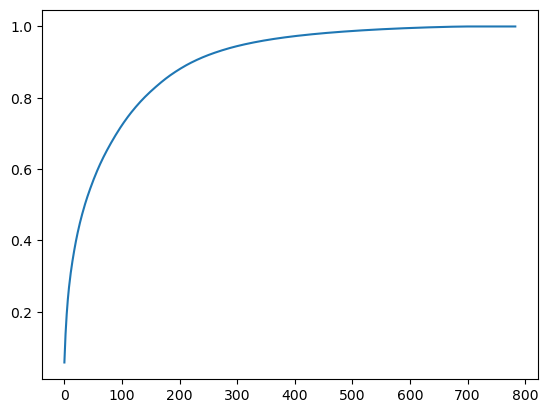

In [104]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

- so from the given we can say that around 200 eigen value give 90 percentage

### When PCA does not work 

1. when data is in circul form 
2. when data is on sepearated in two  groups
3. when data is in absolute graph